# BBC news classification

## Dataset Link
### https://www.kaggle.com/datasets/yufengdev/bbc-fulltext-and-category

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.set_option('Display.max_columns' , 5100)
pd.set_option('Display.max_rows' , 5100)

In [ ]:
path = '../data/bbc-text.csv'

In [4]:
df = pd.read_csv(path)

df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [5]:
df.shape

(2225, 2)

In [6]:
df.isnull().sum()

category    0
text        0
dtype: int64

### NLP operation

In [7]:
import re
import nltk

# split the sentence into a array of words
from nltk.tokenize import word_tokenize

# convert each word into root word
from nltk.stem import WordNetLemmatizer

# To remove the stop words
from nltk.corpus import stopwords

In [8]:
stop_words = stopwords.words('english')

stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [9]:
# define the Lemmatizer
lemmatizer = WordNetLemmatizer()

# define the pattern
pattern = r"[^a-zA-Z0-9 ]"

In [10]:
temp = df['text'][0]
temp 

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [11]:
len(temp)

4333

### Text preprocessing 

In [12]:
def preprocessing(text):
    # apply the pattern(to remove the speicl chars and inks)
    text = re.sub( pattern=pattern , repl='' , string=text)

    # convert the sentence into array of words
    words = word_tokenize( text )

    # apply the stop words to remove and lemmatizer to get the root word
    lemma_words = [lemmatizer.lemmatize(word) for word in words if word not in set(stop_words) ]
    
    res = ' '.join(lemma_words)
    
    return res

In [13]:
df['processed_text'] = df['text'].apply(preprocessing)

In [14]:
df.head()

,category,text,processed_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


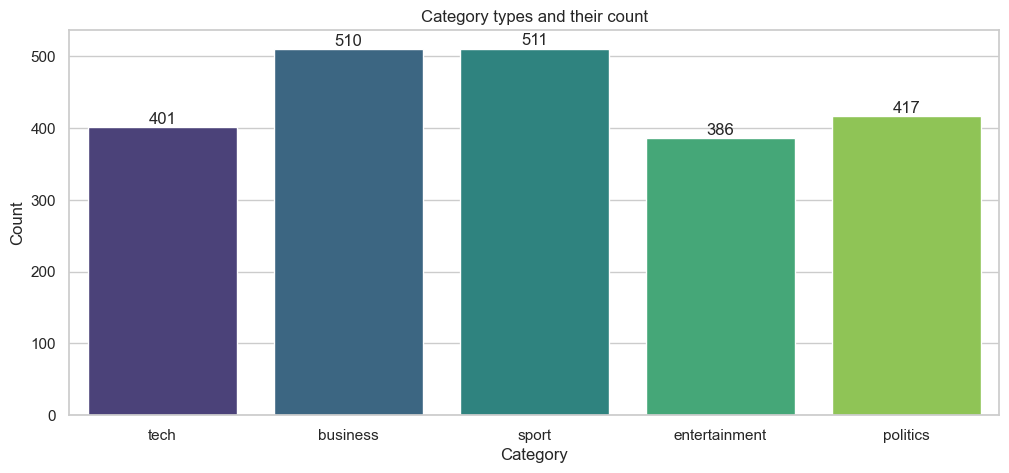

In [15]:
plt.figure(figsize=(12,5))

sns.set(style="whitegrid")

ax = sns.countplot(data=df, x='category', palette='viridis')

plt.title('Category types and their count')
plt.xlabel('Category')
plt.ylabel('Count')

# Add counts on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2.,  # X-coordinate (center of bar)
        height + 0.5,                    # Y-coordinate (slightly above bar)
        int(height),                     # Text (count)
        ha='center',                     # Horizontal alignment
        va='bottom'                      # Vertical alignment
    )

plt.show()

In [16]:
df.head()

,category,text,processed_text
0,tech,tv future in the hands of viewers with home th...,tv future hand viewer home theatre system plas...
1,business,worldcom boss left books alone former worldc...,worldcom bos left book alone former worldcom b...
2,sport,tigers wary of farrell gamble leicester say ...,tiger wary farrell gamble leicester say rushed...
3,sport,yeading face newcastle in fa cup premiership s...,yeading face newcastle fa cup premiership side...
4,entertainment,ocean s twelve raids box office ocean s twelve...,ocean twelve raid box office ocean twelve crim...


In [17]:
X = df['processed_text']
y = df['category']

### split the dataset into train and test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Convert the text into vectors

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
#TF–IDF vectorization
vectorizer = TfidfVectorizer( max_features=5000, ngram_range=(1,2), stop_words='english' )

In [22]:
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()

X_test_tfidf = vectorizer.transform(X_test).toarray()

In [23]:
X_train_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.05689139,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06254136]])

In [24]:
vectorizer.vocabulary_

{'election': 1506,
 'tv': 4675,
 'debate': 1227,
 'say': 3960,
 'blair': 621,
 'tony': 4584,
 'said': 3898,
 'political': 3378,
 'rival': 3827,
 'ahead': 290,
 'answer': 364,
 'campaign': 763,
 'reason': 3641,
 'given': 1959,
 'monthly': 2937,
 'news': 3066,
 'conference': 1032,
 'october': 3122,
 'tory': 4589,
 'leader': 2583,
 'michael': 2861,
 'howard': 2199,
 'mr': 2968,
 'running': 3879,
 'refused': 3691,
 'recent': 3650,
 'year': 4975,
 'opposition': 3177,
 'called': 756,
 'happened': 2075,
 '2001': 80,
 'plan': 3345,
 'william': 4897,
 'hague': 2050,
 'charles': 862,
 'kennedy': 2486,
 'collapsed': 960,
 '1997': 68,
 'john': 2427,
 'major': 2745,
 'cancelled': 771,
 'format': 1842,
 'agreed': 287,
 'televised': 4502,
 'high': 2126,
 'point': 3369,
 'presidential': 3446,
 'tony blair': 4585,
 'blair said': 622,
 'election campaign': 1507,
 'news conference': 3068,
 'tory leader': 4590,
 'leader michael': 2585,
 'michael howard': 2862,
 'howard said': 2201,
 'said mr': 3922,
 'mr 

In [25]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
y_train_pred = model.predict(X_train_tfidf)

y_test_pred = model.predict(X_test_tfidf)

In [29]:
print("Accuracy:", accuracy_score(y_train, y_train_pred) )

confusion_matrix( y_train, y_train_pred )

print("\nClassification Report:\n", classification_report(y_train, y_train_pred))

Accuracy: 0.9953020134228188

Classification Report:
                precision    recall  f1-score   support

     business       1.00      0.99      1.00       329
entertainment       1.00      1.00      1.00       257
     politics       0.99      0.99      0.99       292
        sport       1.00      1.00      1.00       353
         tech       0.98      1.00      0.99       259

     accuracy                           1.00      1490
    macro avg       0.99      1.00      1.00      1490
 weighted avg       1.00      1.00      1.00      1490



In [30]:
print("Accuracy:", accuracy_score(y_test, y_test_pred))

confusion_matrix( y_test, y_test_pred )

print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

Accuracy: 0.9727891156462585

Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.96      0.96       181
entertainment       1.00      0.97      0.98       129
     politics       0.94      0.96      0.95       125
        sport       0.98      1.00      0.99       158
         tech       0.97      0.98      0.98       142

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735



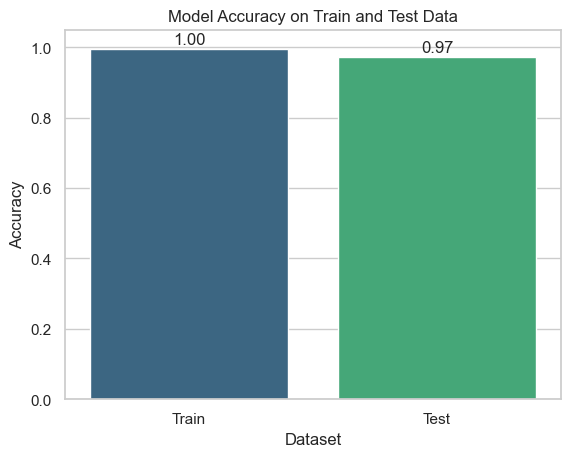

In [31]:
# compute accuracies
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# prepare data for seaborn
acc_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'Accuracy': [train_acc, test_acc]
})

plt.title('Model Accuracy on Train and Test Data')

# plot
sns.barplot(data=acc_df, x='Dataset', y='Accuracy', palette='viridis')

# add values on top
for i, v in enumerate(acc_df['Accuracy']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.05)
plt.show()

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [33]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC(),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc = accuracy_score(y_test, y_pred)*100
    results.append({"Model": name, "Accuracy": acc})
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))



Logistic Regression Accuracy: 97.2789
               precision    recall  f1-score   support

     business       0.97      0.96      0.96       181
entertainment       1.00      0.97      0.98       129
     politics       0.94      0.96      0.95       125
        sport       0.98      1.00      0.99       158
         tech       0.97      0.98      0.98       142

     accuracy                           0.97       735
    macro avg       0.97      0.97      0.97       735
 weighted avg       0.97      0.97      0.97       735


Linear SVM Accuracy: 97.5510
               precision    recall  f1-score   support

     business       0.98      0.95      0.97       181
entertainment       0.98      0.98      0.98       129
     politics       0.94      0.97      0.95       125
        sport       0.99      1.00      0.99       158
         tech       0.98      0.99      0.98       142

     accuracy                           0.98       735
    macro avg       0.97      0.98      0.98  

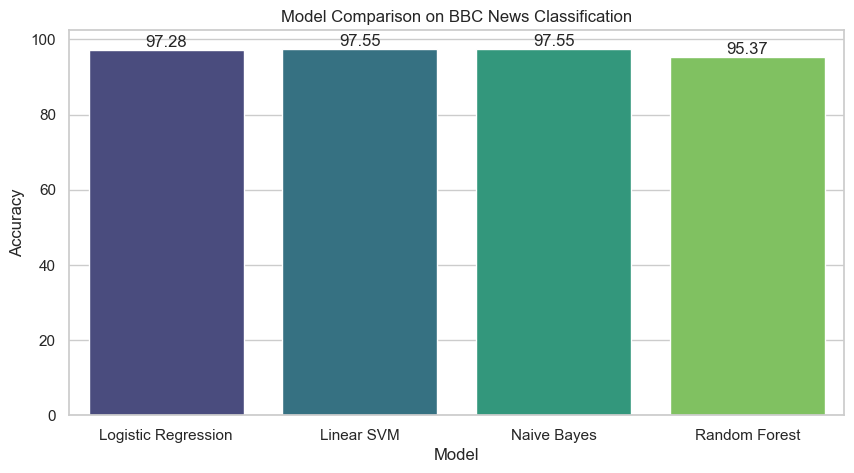

In [34]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(10,5))

sns.barplot(data=results_df, x='Model', y='Accuracy', palette='viridis')

for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', va='bottom')

plt.title('Model Comparison on BBC News Classification')

plt.show()

### save the models

In [42]:
import joblib

In [ ]:
joblib.dump(model, '../models/model.pkl')
joblib.dump(vectorizer, '../models/vectorizer.pkl')

['./models/vectorizer.pkl']

### prediction on new or unseen data

In [35]:
def newSample_prediction( smaple ):
    
    smaple = preprocessing( smaple )
    
    sample = vectorizer.transform( [smaple] ).toarray()
    
    my_prediction = model.predict( sample )[0]
    
    return my_prediction
    

In [36]:
# business news
newData = '''Tata Motors’ upcoming Sierra has been caught testing extensively across diverse road and off-road conditions.Originally showcased as a concept and later as a near-production prototype, the Sierra has steadily evolved from a design study into a full-fledged product, ready to hit the market in the coming months.Although Tata Motors has yet to confirm an official launch schedule, the Sierra is widely expected to hit showrooms within the next three to four months. The company could wrap up the year with another major introduction – likely the petrol-powered variants of the Harrier and Safari – before rolling out the new Sierra soon after.Rather than differentiating them drastically, Tata is going for a unified visual identity with only minor cues setting the ICE and electric versions apart. The SUV will feature an assertive front end complemented by a closed-off grille section, a sculpted bonnet and slim LED headlamps connected by a full-width light bar. A beefy bumper and prominent surface lines will complete the look.'''

In [37]:
newSample_prediction( newData )

'business'

In [38]:
# political news
newData = '''
The President of United States Donald Trump has repeated his claim that India will not be busing Russian oil despite the Ministry of External Affairs (MEA) dismissing that any such call between the US President and Prime Minister Narendra Modi happened at all.

"India is not going to be buying Russian oil anymore, and Hungary is sort of stuck because they have one pipeline... and they're inland — they don't have sea... but India will not be buying oil from Russia," Trump said on Friday speaking at the White House during his meeting with Ukrainian President Volodymyr Zelenskyy.

The MEA on Thursday said it has no information on any telephonic conversation between Prime Minister Narendra Modi and Donald Trump, following the US President's claim that Modi had told him India would not purchase Russian oil.

"Regarding the comment from the US on energy, we have issued a statement, which you can refer to. As for a telephone conversation, I can say that there has been no discussion between the Prime Minister and President Trump," MEA spokesperson Randhir Jaiswal told reporters during a weekly media briefing.

Earlier, Trump had claimed that PM Modi told him that India will stop purchasing oil from Russia.


.@POTUS: "India is not going to be buying Russian oil anymore, and Hungary is sort of stuck because they have one pipeline... and they're inland — they don't have sea... but India will not be buying oil from Russia."
'''

In [39]:
newSample_prediction(newData)

'politics'

In [40]:
# sport news
newData = '''
All hell broke loose after the Indian women's cricket team lost their third match in a row in the Women's ODI World Cup on Sunday, October 19. The Harmanpreet Kaur-led side faltered in a chase of 289 runs on a flat batting pitch at Indore's Holkar Stadium, falling just 4 runs short in what could have been a crucial victory.
A wave of criticism followed the team’s successive losses to South Africa, Australia, and England — all on home soil, during a highly anticipated World Cup campaign. While the team still has a mathematical chance to reach the top four, fans and commentators alike were quick to label their performances as “meek” and “uninspired,” particularly pointing to how the team let games slip from winning positions.
Criticism, of course, is part and parcel of competitive sport. However, what unfolded on social media — particularly on ‘Cricket Twitter’ — after the narrow loss to England crossed into far more toxic territory. While some called for accountability from the Indian women’s team, and rightly so, a disturbing number of voices began to question whether the women’s team even deserved the institutional support they’ve received in recent years.
''' 

In [41]:
newSample_prediction(newData)

'sport'